In [1]:
import numpy as np
import recurrence as rec
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform, cdist

RP with FAN method

In [15]:
#Recurrence matrix updated version
def recurrence_matrix_fan(timeseries, RR, transpose = False):
    nn_i = int(RR*len(timeseries))

    if timeseries.ndim == 1:
        r_matrix = []
        for i in range(len(timeseries)):
            current_row = []
            for j in range(len(timeseries)):
                current_value = np.abs(timeseries[i] - timeseries[j])
                current_row.append(current_value)

            current_row = np.array(current_row)
            recs_i = np.argsort(current_row)[:nn_i]
            current_row[:] = 0
            current_row[recs_i] = 1
        
            r_matrix.append(current_row)
    
        return np.array(r_matrix)
    
    else: 
        '''
        We will use euclidean distance in order to estimate neighbours.
        '''
        #Create distance matrix
        if transpose == True:
            timeseries = timeseries.T

        d_matrix = squareform(pdist(timeseries, metric = 'euclidean'))

        for i in range(d_matrix.shape[0]):
            current_row = d_matrix[i]
            recs_i = np.argsort(current_row)[:nn_i]
            current_row[:] = 0
            current_row[recs_i] = 1

            d_matrix[i] = current_row   

        return d_matrix 

In [16]:
time_series = np.sin(np.linspace(0, 10 * np.pi, 1000))
x = rec.embed(time_series, m=2, tau=50)

In [17]:
rec_x = recurrence_matrix_fan(x,0.06)

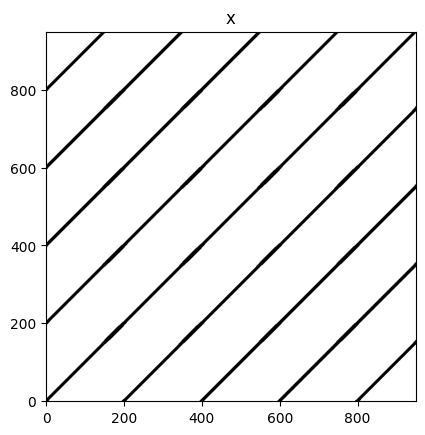

In [18]:
#Visualize
fig, axs = plt.subplots()

#Plot
axs.imshow(rec_x, origin='lower', cmap = 'binary')
axs.set_title('x')


plt.show()

In [19]:
time_series_y = 0.5*np.sin(4*np.linspace(0, 4 * np.pi, 1000)) + np.sin(np.linspace(0, 10 * np.pi, 1000))

In [20]:
y = rec.embed(time_series_y, m=2, tau=50)

In [21]:
rec_y = recurrence_matrix_fan(y,0.06)

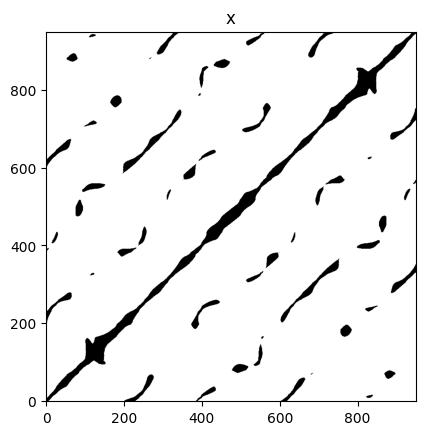

In [22]:
#Visualize
fig, axs = plt.subplots()

#Plot
axs.imshow(rec_y, origin='lower', cmap = 'binary')
axs.set_title('x')


plt.show()